In [9]:
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [3]:
num_dict = {'0': 5923, '1': 6742, '2': 5958, '3': 6131, '4': 5842, '5': 5421, '6': 5918, '7': 6265, '8': 5851, '9': 5949}

In [4]:
for i in range(10):
    random.sample(range(num_dict[str(i)]), 100)

tensor([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1, 103,  63, 251,  63, 101,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          97, 221, 249, 249, 249, 219,   1,   1,   1,   1,   1,   1,   1,   1],
        [  1,   1,   1,   1,   1,   1,   1,   

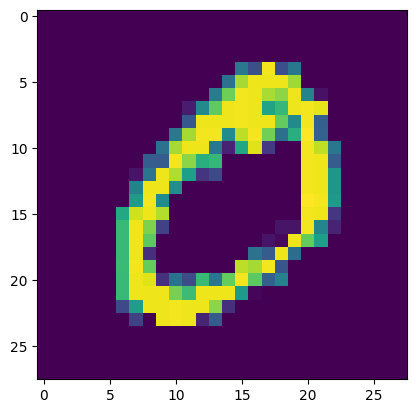

In [10]:
path = 'data\MNIST\png\\0\mnist_0-0.png'
image = Image.open(path)
image = np.array(image)
print(torch.tensor(image))
print(image.shape)
plt.imshow(image)

In [8]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from model.resNet import ResNet
from utils.logger import get_logger
from utils.dataloader import sampleDataset
import argparse
import importlib
import os
from train import train
from test import test


# logger = get_logger(path=args.output+'/'+args.model+'/', filename=args.model+'.log')


#如果网络能在GPU中训练，就使用GPU；否则使用CPU进行训练
device = "cuda:0" if torch.cuda.is_available() else "cpu"
# device = 'cpu'

train_df = pd.read_csv('./train_0.7.csv')
train_ds = sampleDataset(df=train_df)

#这个函数包括了两个操作：将图片转换为张量，以及将图片进行归一化处理
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(mean = [0.5],std = [0.5])])

path = './data/'  #数据集下载后保存的目录
#设定每一个Batch的大小
BATCH_SIZE = 16

#下载训练集和测试集
# trainData = torchvision.datasets.MNIST(path,train = True,transform = transform, download = True)
testData = torchvision.datasets.MNIST(path,train = False,transform = transform)

 
#构建数据集和测试集的DataLoader
trainDataLoader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

for data, idx in trainDataLoader:
    print('data:', data.shape)
    print('idx:', idx.shape)
    m, s = data.mean(), data.std()
    data = (data - m)/s
    print('after:', data.shape)
    print(data)

data: torch.Size([16, 1, 28, 28])
idx: torch.Size([16])
after: torch.Size([16, 1, 28, 28])
tensor([[[[-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          ...,
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958]]],


        [[[-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          ...,
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958],
          [-0.3958, -0.3958, -0.3958,  ..., -0.3958, -0.3958, -0.3958]]],


       

KeyboardInterrupt: 

In [6]:
from PIL import Image
import numpy as np
image = np.array(Image.open('data\MNIST\png\\0\mnist_0-0.png'))
image = torch.tensor(np.array(image), dtype=torch.float64)
image1 = np.array(Image.open('data\MNIST\png\\1\mnist_0-1.png'))
image1 = torch.tensor


tensor([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
           1.,   1.,   1., 103.,  63., 251.,  63., 101.,   1.,   1.,   1.,   1.,
           1.,   1.,   1.,   1.],
        [  1.,   1.,

In [9]:
a = [np.random.rand(2, 3), np.random.rand(2, 3)]
print(a)
a = np.concatenate(a, axis=0)
print(a)

[array([[0.29316698, 0.32269991, 0.10349222],
       [0.87190719, 0.63508219, 0.40336344]]), array([[0.75912933, 0.89584924, 0.05495017],
       [0.70226365, 0.76001042, 0.07729522]])]
[[0.29316698 0.32269991 0.10349222]
 [0.87190719 0.63508219 0.40336344]
 [0.75912933 0.89584924 0.05495017]
 [0.70226365 0.76001042 0.07729522]]


In [18]:
eye = np.eye(10)
labels = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6]).to('cuda:0')
ls = [1, 3, 1, 8, 1, 4, 5]
print(eye[labels.to('cpu')])
print(labels)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], device='cuda:0')
